In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy
from tensorflow.keras.models import load_model

In [2]:
st = obspy.read()

wf = np.zeros((1, 3000, 3))
wf[0, :, 2] = st[0].data   # Z
wf[0, :, 1] = st[1].data   # N
wf[0, :, 0] = st[2].data   # E

In [3]:
wf -= np.mean(wf)
wf /= np.std(wf)

In [4]:
BASEpicker = load_model('BestBase_R2Unet.h5')

In [5]:
predB = BASEpicker.predict(wf)

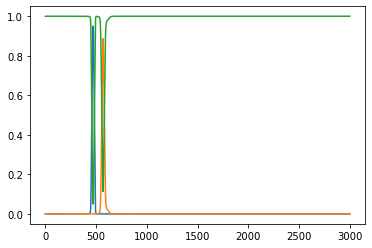

In [6]:
plt.plot(predB[0, :, :])
plt.show()

In [7]:
KFpicker = load_model('KFpicker_best.h5')

In [8]:
pred = KFpicker.predict(wf)

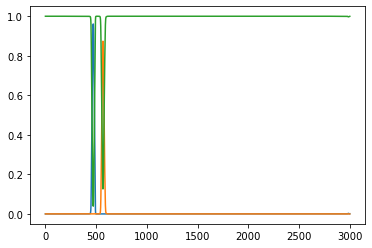

In [9]:
plt.plot(pred[0, :, :])
plt.show()